In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 15:38:20,207 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:38:20,209 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:38:20,210 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:38:20,227 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 15:38:20,228 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 15:38:20,240 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 15:38:20,567 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 15:38:20,690 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:38:20,691 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:38:20,701 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:38:20,703 - settings - Setting enable_python_native_blobs to True


Sleeping 7 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 15:38:21,094 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 6548


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,110.528,545.626,544.758,2022,0.00019955997643994288,7.352727272727273,5469042.445,122,0.0003697173719777192,16.574,270764755455.50858,71119038.51464462,26722.95164167566,49508.62206290823,2219383241.438595,3221.0944
864691135065024068,0,0.25,29.00,0,0,1,=BLOB=,1683573,3378174,0,2,2,0,1,11,341,101,15436156.56531248,4728701.448726788,29394.698,311.757,282.738,609.362,594.189,4971,0.00032203612207268187,14.577712609970675,12419519.814,240,0.00040025702075827455,20.712,539357389298.1111,63617255.66268921,34941.17120515178,43428.199912376345,2247322455.4087963,6815.4656
864691135065033540,0,0.25,29.00,0,0,1,=BLOB=,788810,1618020,0,2,2,1,2,7,202,142,7316260.375838028,4091724.4008084666,21512.089,103.41,103.41,416.992,381.352,2199,0.0003005633871727972,10.886138613861386,3494175.925,84,0.0006293329377798859,26.179,450362108267.2257,122117801.5433146,61556.3259277305,128889.36273786092,5361453669.847925,1706.8981
864691135210051520,0,0.25,29.00,0,0,1,=BLOB=,498916,1023655,0,1,1,0,1,13,162,65,6094179.568630371,2578115.586153359,19166.911,95.1

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,26948,35067,2021-01-13 03:34:10
__neuron_split_suggestions,1e759e336b7fd0f8b6b150213aba454d,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8744,35479,2021-01-13 09:35:01
__neuron_split_suggestions,3231c2b8558606a7b2429fedd34acd41,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8681,35478,2021-01-13 09:34:54
__neuron_split_suggestions,93f5439bd0f5692e8798f042bccb377c,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8870,35481,2021-01-13 09:35:14
__neuron_split_suggestions,e9cc3e87e657666495518ed6b4272501,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8807,35480,2021-01-13 09:35:08


Populate Started


INFO - 2021-01-13 15:38:21,344 - autopopulate - Found 55 keys to populate
INFO - 2021-01-13 15:38:21,376 - connection - Transaction started
INFO - 2021-01-13 15:38:21,380 - autopopulate - Populating: {'segment_id': 864691135462301853, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}




----- Working on Neuron 864691135462301853-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0 2]


 -------- Working on limb 0------------
Starting combinations to process = [[61 74]
 [61 75]
 [74 75]]


---- working on disconnecting 61 and 74
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [61, 58, 55, 54, 41, 32, 21, 28, 34, 36, 73, 74]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [11 12 13 21 28 29 32 34 35 36 39 40 41 53 54 55 56 57 58 60 65 69 73]
Short segments to combine = []
Found 2 high degree coordinates to cut
Picking [766376. 459490. 757803.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches =

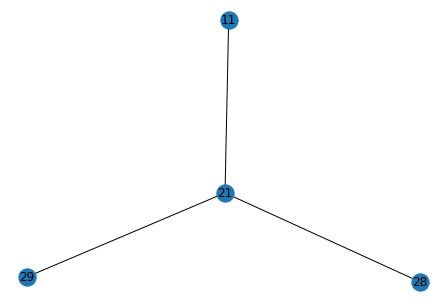

match_branches = [[21, 28]]
edges_to_delete (resolve crossover) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create (resolve crossover) = [[21, 28]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 74 because skeletal distance was 101.60639530813745 and threshold was 2500
skip_nodes = [74]
edges_to_delete (cut_limb_network) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create = [[21, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77}
Comp 1 = {11}
Comp 2 = {72, 9, 75, 47, 29}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
curr_limb_copy.created_edges = [[21, 28]]
After get best cut: cut_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]], ad

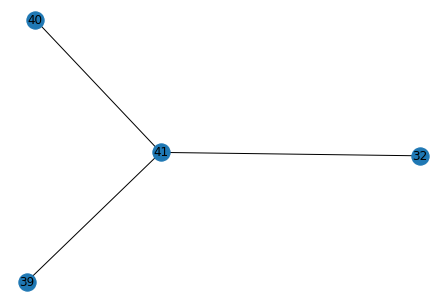

match_branches = [[32, 41]]
edges_to_delete (resolve crossover) = [[32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
edges_to_create (resolve crossover) = [[32, 41]]
curr_limb.deleted_edges 5 =[[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
Skipping endnode 74 because skeletal distance was 101.60639530813745 and threshold was 2500
skip_nodes = [74]
edges_to_delete (cut_limb_network) = [[32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
edges_to_create = [[32, 41]]
Number of connected components = 5
Comp 0 = {4, 8, 12, 13, 15, 16, 21, 25, 28, 32, 34, 35, 36, 41, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 68, 69, 73, 74}
Comp 1 = {11}
Comp 2 = {72, 9, 75, 47, 29}
Comp 3 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 62, 63, 64, 67, 76, 77}
Comp 4 = {40, 70, 71}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
curr_limb_

  Edge: [61 58]: curr_angle = 62.54
  Edge: [58 55]: curr_angle = 23.05
  Edge: [55 54]: curr_angle = 13.22
  Edge: [54 41]: curr_angle = 6.83
  Edge: [41 32]: curr_angle = 19.83
  Edge: [32 21]: curr_angle = 37.01
  Edge: [21 28]: curr_angle = 9.97
  Edge: [28 34]: curr_angle = 3.04
  Edge: [34 36]: curr_angle = 130.36
  Edge: [36 73]: curr_angle = 44.2

Total time for doubling_back = 1.282808780670166
There were 1 edges that passed doubling back threshold of 100
Winning edge [34 36] had a doubling back of 130.35759779681874
***inside resolve crossover!!!!****
coordinate_branches = [12, 34, 36]
12 = red
34 = aqua
36 = purple
Angle between 12 and 34 = 14.15 
Angle between 12 and 36 = 48.62 
Angle between 34 and 36 = 139.17 
Final Matches = [[12, 34]]
matched_branches_revised = [[12, 34]]
Original graph


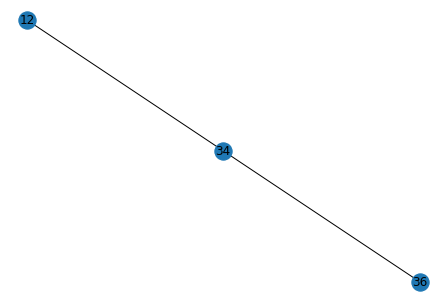

match_branches = [[12, 34]]
edges_to_delete (resolve crossover) = [[12, 36], [34, 36]]
edges_to_create (resolve crossover) = [[12, 34]]
edges_to_delete (cut_limb_network) = [array([12, 36]), array([34, 36])]
edges_to_create = [[12, 34]]
Number of connected components = 6
Comp 0 = {65, 66, 36, 69, 68, 8, 73, 74, 15, 16, 25}
Comp 1 = {4, 12, 13, 21, 28, 32, 34, 35, 41, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Comp 2 = {11}
Comp 3 = {72, 9, 75, 47, 29}
Comp 4 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 62, 63, 64, 67, 76, 77}
Comp 5 = {40, 70, 71}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 40], [39, 40], [39, 41], [40, 41], array([12, 36]), array([34, 36])]
curr_limb_copy.created_edges = [[21, 28], [32, 41], [12, 34]]
After get best cut: cut_edges = [array([12, 36]), array([34, 36])], added_edges = [[12, 34]]
total_soma_paths_to_cut = [[11, 21], [11, 28]

  Edge: [20 18]: curr_angle = 33.14
  Edge: [18 17]: curr_angle = 20.18
  Edge: [17 13]: curr_angle = 18.27
  Edge: [13  9]: curr_angle = 27.9
  Edge: [9 8]: curr_angle = 13.75
  Edge: [ 8 11]: curr_angle = 155.7
  Edge: [11 14]: curr_angle = 58.35
  Edge: [14 40]: curr_angle = 80.91
  Edge: [40 34]: curr_angle = 76.89
  Edge: [34 23]: curr_angle = 67.15

Total time for doubling_back = 0.7814135551452637
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 8 11] had a doubling back of 155.69649710323148
***inside resolve crossover!!!!****
coordinate_branches = [6, 8, 11]
6 = red
8 = aqua
11 = purple
Angle between 6 and 8 = 22.16 
Angle between 6 and 11 = 5.01 
Angle between 8 and 11 = 158.46 
Final Matches = [[6, 8], [6, 11]]
matched_branches_revised = [[6, 11]]
Original graph


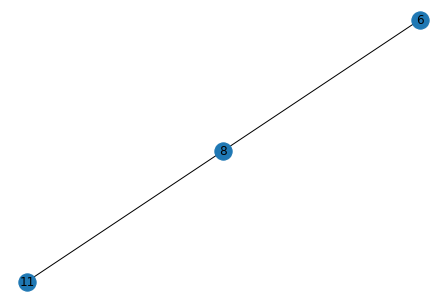

match_branches = [[6, 11]]
edges_to_delete (resolve crossover) = [[6, 8], [8, 11]]
edges_to_create (resolve crossover) = [[6, 11]]
edges_to_delete (cut_limb_network) = [array([6, 8]), array([ 8, 11])]
edges_to_create = [[6, 11]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 5, 8, 9, 10, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 41, 42, 43, 44}
Comp 1 = {1, 34, 33, 6, 7, 40, 38, 39, 11, 14, 16, 23}
curr_limb_copy.deleted_edges = [array([6, 8]), array([ 8, 11])]
curr_limb_copy.created_edges = [[6, 11]]
After get best cut: cut_edges = [array([6, 8]), array([ 8, 11])], added_edges = [[6, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  4,  5,  8

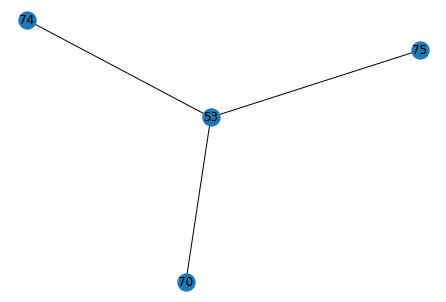

match_branches = [[53, 75], [70, 74]]
edges_to_delete (resolve crossover) = [[53, 70], [53, 74], [70, 75], [74, 75]]
edges_to_create (resolve crossover) = [[53, 75], [70, 74]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[53, 70], [53, 74], [70, 75], [74, 75]]
edges_to_create = [[53, 75], [70, 74]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35.0, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 56, 58, 60, 64, 69, 75, 77, 78}
Comp 1 = {36, 44, 45, 46, 54, 55, 57, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76}
curr_limb_copy.deleted_edges = [[53, 70], [53, 74], [70, 75], [74, 75]]
curr_limb_copy.created_edges = [[53, 75], [70, 74]]
After get best cut: cut_edges = [[53, 70], [53, 74], [70, 75], [74, 75]], added_edges = [[53, 75], [70, 74]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 

  Edge: [33 30]: curr_angle = 37.8
  Edge: [30 37]: curr_angle = 65.31
  Edge: [37 53]: curr_angle = 31.48
  Edge: [53 75]: curr_angle = 13.09

Total time for doubling_back = 0.28604769706726074

Attempting the width jump check (attempting from both sides)
  Edge: [33 30]: jump = 85.32
  Edge: [30 37]: jump = -585.79
  Edge: [37 53]: jump = -23.74
  Edge: [53 75]: jump = -9.48
Total time for width = 0.2624039649963379
Path starting at 33 had err_edges: []
  Edge: [75 53]: jump = 9.48
  Edge: [53 37]: jump = 23.74
  Edge: [37 30]: jump = 585.79
Adding error edge [37 30] because width jump was 585.7860881705531
  Edge: [30 33]: jump = -85.32
Total time for width = 0.5356369018554688
Path starting at 75 had err_edges: [[37, 30]]
first_error_sizes = [-inf, 585.7860881705531], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [26, 30, 37]
26 = red
30 = aqua
37 = purple
Angle between 26 and 30 = 26.69 
Angle between 26 and 37 = 95.72 
Angle between 30 and 37 = 58.39 

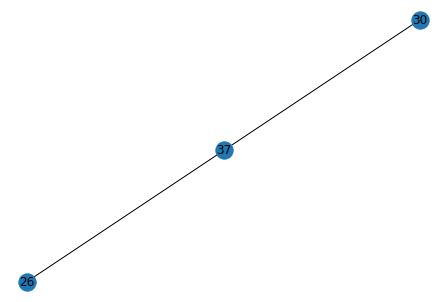

match_branches = [[26, 30]]
edges_to_delete (resolve crossover) = [[26, 37], [30, 37]]
edges_to_create (resolve crossover) = [[26, 30]]
edges_to_delete (cut_limb_network) = [array([26, 37]), array([30, 37])]
edges_to_create = [[26, 30]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35.0, 38, 39, 40, 41, 42, 43, 47, 48, 50, 51, 52, 56, 58, 60, 64, 69, 77, 78}
Comp 1 = {49, 75, 53, 37}
Comp 2 = {36, 44, 45, 46, 54, 55, 57, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76}
curr_limb_copy.deleted_edges = [[53, 70], [53, 74], [70, 75], [74, 75], array([26, 37]), array([30, 37])]
curr_limb_copy.created_edges = [[53, 75], [70, 74], [26, 30]]
After get best cut: cut_edges = [array([26, 37]), array([30, 37])], added_edges = [[26, 30]]
total_soma_paths_to_cut = [[53, 70], [53, 74], [70, 75], [74, 75]]
-----------counter = 1------------
 Cut iteration 2
Total numb

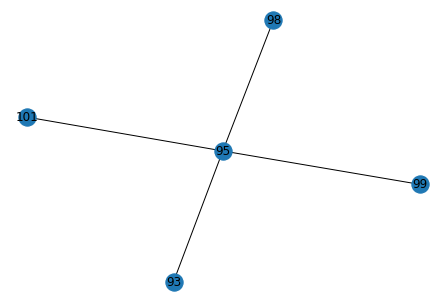

match_branches = [[93, 99]]
edges_to_delete (resolve crossover) = [[93, 95], [93, 98], [93, 101], [95, 98], [95, 99], [95, 101], [98, 99], [98, 101], [99, 101]]
edges_to_create (resolve crossover) = [[93, 99]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[93, 95], [93, 98], [93, 101], [95, 98], [95, 99], [95, 101], [98, 99], [98, 101], [99, 101]]
edges_to_create = [[93, 99]]
Number of connected components = 4
Comp 0 = {99, 93}
Comp 1 = {90, 91, 75, 76, 77, 78, 79, 63, 85, 87, 88, 89, 58, 59, 92, 61, 94, 95}
Comp 2 = {98}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 86, 96, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117}
curr_limb_copy.deleted_edges

  Edge: [0 2]: curr_angle = 45.31

Total time for doubling_back = 0.24196982383728027

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -103.02
Total time for width = 0.294724702835083
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 103.02
Total time for width = 0.2930114269256592
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135609493511 = 187.7392542362213 ------


----- Working on Neuron 864691135570745325-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Wor

  Edge: [6 7]: curr_angle = 151.05
  Edge: [7 9]: curr_angle = 23.5
  Edge: [ 9 10]: curr_angle = 29.22
  Edge: [10  3]: curr_angle = 118.34
  Edge: [3 2]: curr_angle = 96.2
  Edge: [2 8]: curr_angle = 154.94

Total time for doubling_back = 0.4154834747314453
There were 3 edges that passed doubling back threshold of 100
Winning edge [2 8] had a doubling back of 154.935714210408
***inside resolve crossover!!!!****
coordinate_branches = [0, 2, 8]
0 = red
2 = aqua
8 = purple
Angle between 0 and 2 = 92.6 
Angle between 0 and 8 = 43.32 
Angle between 2 and 8 = 58.18 
Final Matches = []
matched_branches_revised = []
Original graph


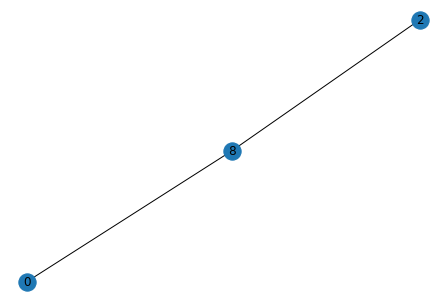

match_branches = []
edges_to_delete (resolve crossover) = [[0, 2], [0, 8], [2, 8]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([0, 2]), array([0, 8]), array([2, 8])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0}
Comp 2 = {8}
curr_limb_copy.deleted_edges = [array([0, 2]), array([0, 8]), array([2, 8])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([0, 2]), array([0, 8]), array([2, 8])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 6 and 18
---- This disconnects S1_1 from S0_0  
 Cut iteration 0
Tota

  Edge: [6 7]: curr_angle = 39.08
  Edge: [7 9]: curr_angle = 23.5
  Edge: [ 9 10]: curr_angle = 29.22
  Edge: [10  3]: curr_angle = 118.34
  Edge: [ 3 12]: curr_angle = 20.46
  Edge: [12 19]: curr_angle = 37.02
  Edge: [19 17]: curr_angle = 20.6
  Edge: [17 18]: curr_angle = 15.93

Total time for doubling_back = 1.126573085784912
There were 1 edges that passed doubling back threshold of 100
Winning edge [10  3] had a doubling back of 118.33963959435485
***inside resolve crossover!!!!****
coordinate_branches = [3, 10, 12]
3 = red
10 = aqua
12 = purple
Angle between 3 and 10 = 124.87 
Angle between 3 and 12 = 28.11 
Angle between 10 and 12 = 83.11 
Final Matches = [[3, 12]]
matched_branches_revised = [[3, 12]]
Original graph


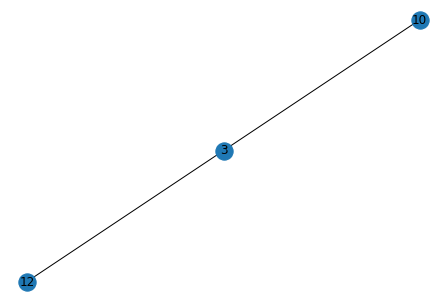

match_branches = [[3, 12]]
edges_to_delete (resolve crossover) = [[3, 10], [10, 12]]
edges_to_create (resolve crossover) = [[3, 12]]
edges_to_delete (cut_limb_network) = [array([ 3, 10]), array([10, 12])]
edges_to_create = [[3, 12]]
Number of connected components = 4
Comp 0 = {1, 2, 3, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {4, 5, 6, 7, 9, 10, 11, 13, 14}
Comp 2 = {0}
Comp 3 = {8}
curr_limb_copy.deleted_edges = [array([0, 2]), array([0, 8]), array([2, 8]), array([ 3, 10]), array([10, 12])]
curr_limb_copy.created_edges = [[3, 12]]
After get best cut: cut_edges = [array([ 3, 10]), array([10, 12])], added_edges = [[3, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 8 and 18
---- Thi

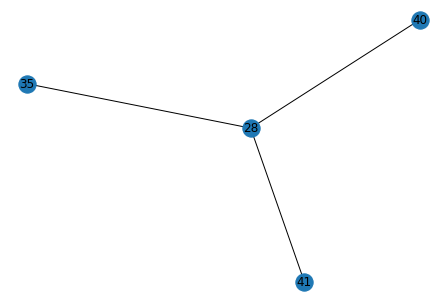

match_branches = [[28, 41], [35, 40]]
edges_to_delete (resolve crossover) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create (resolve crossover) = [[28, 41], [35, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create = [[28, 41], [35, 40]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 26, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 2 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41]]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [[28, 35], [28, 40], [35, 41], [40, 41]], added_edges = [[28, 41], [35, 40]]
total_soma_paths_to_cut = []
-----------c

  Edge: [60 58]: curr_angle = 24.85
  Edge: [58 54]: curr_angle = 29.51
  Edge: [54 52]: curr_angle = 48.69
  Edge: [52 33]: curr_angle = 13.71
  Edge: [33 31]: curr_angle = 30.46
  Edge: [31 36]: curr_angle = 90.26
  Edge: [36 38]: curr_angle = 72.14
  Edge: [38 67]: curr_angle = 11.07
  Edge: [67 68]: curr_angle = 37.15
  Edge: [68 70]: curr_angle = 46.29

Total time for doubling_back = 1.701092004776001

Attempting the width jump check (attempting from both sides)
  Edge: [60 58]: jump = -120.24
  Edge: [58 54]: jump = 3.91
  Edge: [54 52]: jump = -94.03
  Edge: [52 33]: jump = -127.17
  Edge: [33 31]: jump = -32.5
  Edge: [31 36]: jump = 45.06
  Edge: [36 38]: jump = 271.97
Adding error edge [36 38] because width jump was 271.96868872259677
  Edge: [38 67]: jump = 114.05
  Edge: [67 68]: jump = 10.47
  Edge: [68 70]: jump = 294.5
Adding error edge [68 70] because width jump was 294.4950900973778
Total time for width = 1.9279193878173828
Path starting at 60 had err_edges: [[36, 38],

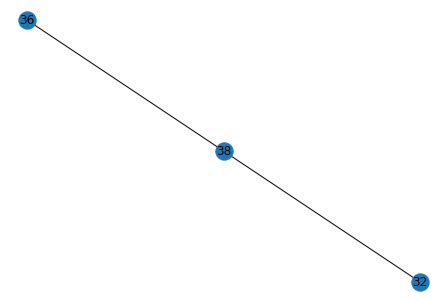

match_branches = [[32, 38]]
edges_to_delete (resolve crossover) = [[32, 36], [36, 38]]
edges_to_create (resolve crossover) = [[32, 38]]
edges_to_delete (cut_limb_network) = [array([32, 36]), array([36, 38])]
edges_to_create = [[32, 38]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {29, 31, 33, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64}
Comp 2 = {9, 26, 30, 32, 38, 49, 51, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 3 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41], array([32, 36]), array([36, 38])]
curr_limb_copy.created_edges = [[28, 41], [35, 40], [32, 38]]
After get best cut: cut_edges = [array([32, 36]), array([36, 38])], added_edges = [[32, 38]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs a

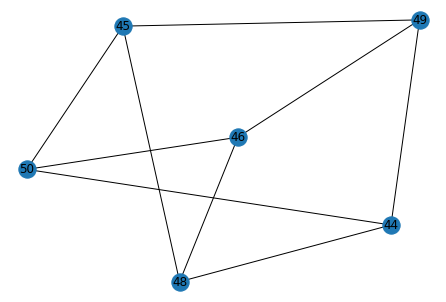

match_branches = [[46, 50]]
edges_to_delete (resolve crossover) = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
edges_to_create (resolve crossover) = [[46, 50]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
edges_to_create = [[46, 50]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 46, 47, 48, 49.0, 50.0, 51, 54, 55, 56, 57.0, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81}
Comp 1 = {38, 41, 42, 44, 45}
Comp 2 = {52}
Comp 3 = {53}
Comp 4 = {76}
curr_limb_copy.deleted_edges = [[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], 

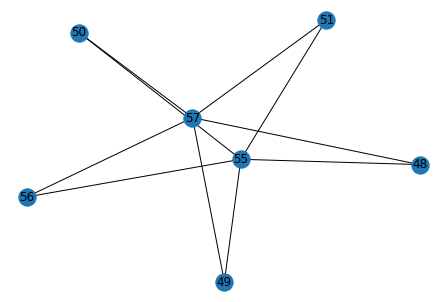

match_branches = [[50, 55], [49, 57], [48, 56]]
edges_to_delete (resolve crossover) = [[48, 49], [48, 50], [48, 51], [48, 55], [48, 57], [49, 50], [49, 51], [49, 55], [49, 56], [50, 51], [50, 56], [50, 57], [51, 55], [51, 56], [51, 57], [55, 56], [55, 57], [56, 57]]
edges_to_create (resolve crossover) = [[50, 55], [49, 57], [48, 56]]
curr_limb.deleted_edges 5 =[[44, 45], [44, 46], [44, 48], [44, 49], [44, 50], [45, 46], [45, 48], [45, 49], [45, 50], [46, 48], [46, 49], [48, 49], [48, 50], [49, 50]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[48, 49], [48, 50], [48, 51], [48, 55], [48, 57], [49, 50], [49, 51], [49, 55], [49, 56], [50, 51], [50, 56], [50, 57], [51, 55], [51, 56], [51, 57], [55, 56], [55, 57], [56, 57]]
edges_to_create = [[50, 55], [49, 57], [48, 56]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 10, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 43, 46, 47, 49.0, 50.0, 55, 57.0, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6

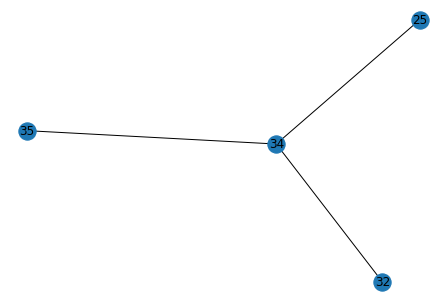

match_branches = []
edges_to_delete (resolve crossover) = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {10, 23, 35, 36, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62.0, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Comp 1 = {1, 2, 4, 7, 11, 21, 25}
Comp 2 = {0, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 3 = {34}
Comp 4 = {33}
Comp 5 = {59}
Comp 6 = {65}
Comp 7 = {90}
curr_limb_copy.deleted_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 

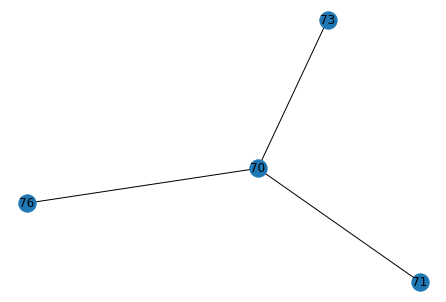

match_branches = [[71, 73]]
edges_to_delete (resolve crossover) = [[70, 71], [70, 73], [70, 76], [71, 76], [73, 76]]
edges_to_create (resolve crossover) = [[71, 73]]
curr_limb.deleted_edges 5 =[[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[70, 71], [70, 73], [70, 76], [71, 76], [73, 76]]
edges_to_create = [[71, 73]]
Number of connected components = 10
Comp 0 = {10, 23, 35, 36, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62.0, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Comp 1 = {70}
Comp 2 = {76}
Comp 3 = {1, 2, 4, 7, 11, 21, 25}
Comp 4 = {0, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 5 = {34}
Comp 6 = {33}
Comp 7 = {59}
Comp 8 = {65}
Comp 9 = {90}
curr_limb_copy.deleted_edges = [[25, 32], [25, 34], [25, 35], [32, 34], [32, 35], [34, 35], [70, 71], [70, 73], [70, 76],

In [ ]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")